In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist, cifar10, cifar100

from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

import numpy as np
import random

import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [6]:
img_rows, img_cols, channels = 28, 28, 1
num_classes = 10

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape((-1, img_rows, img_cols, channels))
x_test = x_test.reshape((-1, img_rows, img_cols, channels))

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print("Data shapes", x_test.shape, y_test.shape, x_train.shape, y_train.shape)

Data shapes (10000, 28, 28, 1) (10000, 10) (60000, 28, 28, 1) (60000, 10)


In [7]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(3, 3), padding='same', activation='relu', input_shape=(img_rows, img_cols, channels)))
    model.add(Conv2D(64, kernel_size=(3, 3), strides=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), strides=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(Dropout(0.2))
    model.add(Dense(32))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    
    return model

model = create_model()

In [8]:
model.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0198 - accuracy: 0.8628 - val_loss: 0.0065 - val_accuracy: 0.9572
Epoch 2/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0092 - accuracy: 0.9406 - val_loss: 0.0050 - val_accuracy: 0.9671
Epoch 3/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0073 - accuracy: 0.9528 - val_loss: 0.0041 - val_accuracy: 0.9730
Epoch 4/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0063 - accuracy: 0.9595 - val_loss: 0.0042 - val_accuracy: 0.9725
Epoch 5/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0057 - accuracy: 0.9639 - val_loss: 0.0040 - val_accuracy: 0.9744
Epoch 6/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0052 - accuracy: 0.9673 - val_loss: 0.0040 - val_accuracy: 0.9749
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0048 - accuracy: 0.9696 - val_loss: 0.0034 - val_ac

In [9]:
print("Base accuracy on regular images:", model.evaluate(x=x_test, y=y_test, verbose=0))

Base accuracy on regular images: [0.0031023863703012466, 0.9818999767303467]


In [10]:
def adversarial_pattern(image, label):
    image = tf.cast(image, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = tf.keras.losses.MSE(label, prediction)
    
    gradient = tape.gradient(loss, image)
    signed_grad = tf.sign(gradient)
    return signed_grad

In [11]:
image = x_train[0]
image_label = y_train[0]

In [12]:
print(image_label)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:

perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), image_label).numpy()

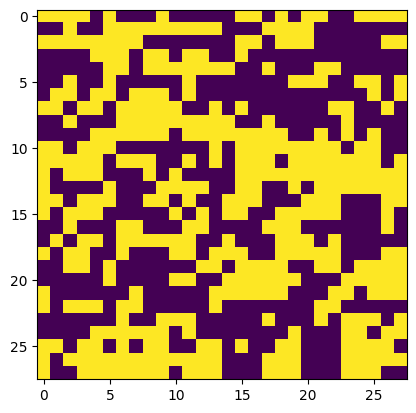

In [14]:
plt.imshow(perturbations.reshape((img_rows, img_cols)))

In [15]:
adversarial = image + perturbations * 0.1

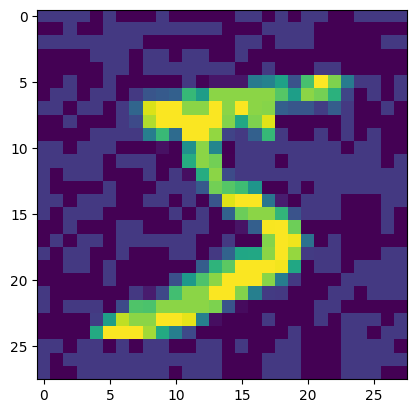

In [16]:
if channels == 1:
    plt.imshow(adversarial.reshape((img_rows, img_cols)))
else:
    plt.imshow(adversarial.reshape((img_rows, img_cols, channels)))
plt.show()

In [17]:
print(labels[model.predict(image.reshape((1, img_rows, img_cols, channels))).argmax()])
print(labels[model.predict(adversarial).argmax()])

1/1 [==============================] - 0s 128ms/step
five
1/1 [==============================] - 0s 32ms/step
three
